In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import Image

In [110]:
# ----- Initial Values -----
b = 4
c = 6
phi_deg = 90
phi_rad = 0
d_phi   = 20
dd_phi  = 2
# ---------------------------

if not phi_deg:
    phi = phi_rad
    print(phi)
else:
    phi = phi_deg * np.pi/180

In [111]:
'''
Calculates interior and exterior angle measures, piston position, velocity and acceleration

Arguments:
b -- Crank length
c -- Connecting rod length
d_phi -- Motor velocity
dd_phi -- Motor acceleration
'''
def calculate_outputs(b, c, phi, d_phi, dd_phi):
    
    # Inner angle measure and its supplement
    theta1 = np.arcsin(b*np.sin(phi)/c)
    theta  = np.pi - theta1

    # Velocity and acceleration
    d_theta1  = b*d_phi*np.cos(phi)/(c*np.cos(theta))
    dd_theta1 = ( b*dd_phi*np.cos(phi) \
                 -b*d_phi**2*np.sin(phi) \
                 +(c*d_theta1**2*np.sin(theta)) \
                )/(c*np.cos(theta))

    # Piston position, velocity, acceleration
    x    = b*np.cos(phi)+c*np.cos(theta1)
    d_x  = -b*d_phi*np.sin(phi)+c*d_theta1*np.sin(theta)
    dd_x = -b*dd_phi*np.sin(phi)-b*d_phi**2*np.cos(phi)+c*dd_theta1*np.sin(theta)+c*d_theta1**2*np.cos(theta)
    
    return (theta, theta1, d_theta1, dd_theta1, x, d_x, dd_x)

In [112]:
# 100 data points between 0 and 2Pi
phi = np.linspace(0,2*np.pi,100)+phi
theta, theta1, d_theta1, dd_theta1, x, d_x, dd_x = calculate_outputs(b,c,phi,d_phi,dd_phi)

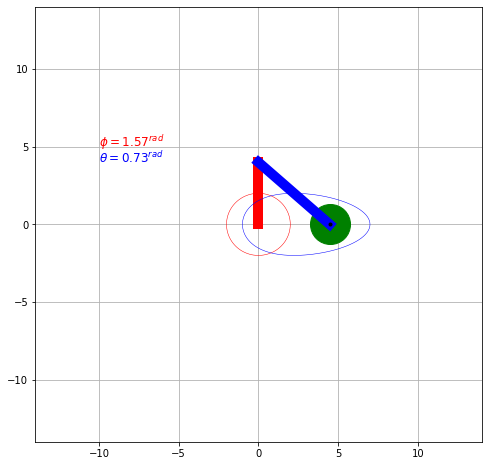

In [109]:
# Animation loop updates coordinate positions for each object
def animate(i):
    cr_dx.append(b*np.cos(phi[i])/2)
    cr_dy.append(b*np.sin(phi[i])/2) 
    co_dx.append(b*np.cos(phi[i])+(x[i]-b*np.cos(phi[i]))/2)
    co_dy.append(b*np.sin(phi[i])/2)
    crank.set_data([0,b*np.cos(phi[i])],[0,b*np.sin(phi[i])])
    ball.set_data(x[i],0)
    conn.set_data([b*np.cos(phi[i]),x[i]],[b*np.sin(phi[i]),0])
    bolt.set_data(x[i],0)
    cr_line.set_data(cr_dx,cr_dy)
    co_line.set_data(co_dx,co_dy)
    text_cr.set_text(f'$\\phi={phi[i]:0.2f}^{{rad}}$')
    text_co.set_text(f'$\\theta={theta1[i]:0.2f}^{{rad}}$')
    
    return fig,

# Initialize all line objects
fig, ax = plt.subplots(figsize=(8,8))
crank, = ax.plot([],[],color='r',lw=10)
ball,  = ax.plot([],[],'go',ms=40)
conn,  = ax.plot([],[],color='b',lw=10)
bolt,  = ax.plot([],[],'ko',ms=3)
cr_dx, cr_dy, co_dx, co_dy = [],[],[],[]

# Initialize midpoint line and text objects
cr_line, = ax.plot([],[],'r-',lw=0.5)
co_line, = ax.plot([],[],'b-',lw=0.5)
text_cr  = ax.annotate('',(-10,5),size=12,color='r')
text_co  = ax.annotate('',(-10,4),size=12,color='b')

plt.grid()

# Resize plot using max dimensions of the linkages
axes_limit = b + c + 4
ax.set(xlim=(-axes_limit,axes_limit),ylim=(-axes_limit,axes_limit))

ani = animation.FuncAnimation(fig, animate, frames=100, interval=50)
ani.save('animated3.gif',writer='pillow',fps=d_phi)


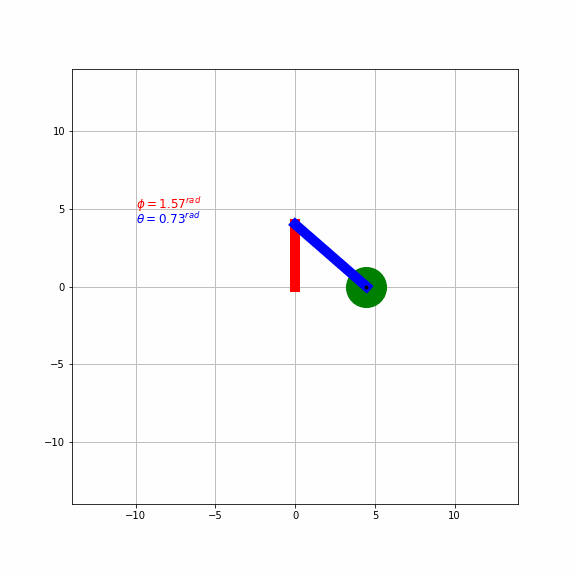

In [113]:
Image('animated3.gif')